In [ ]:
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.decomposition import PCA
import yaml
# import pickle as pkl
import subprocess
# from keras.regularizers import L1L2

from src.data_preparation import load_data
# from src.data_preparation.blocking_time_series_split import BlockingTimeSeriesSplit 
# from src.data_preparation import mdl_dataset_prep
from src.data_preparation import mdl_dataset

# from src.modelling import mdl_input_dico  # input variables class
# from src.modelling import mdl_params  # parameters class
# from src.modelling import mdl_history

# from src.modelling import model_autokeras
# from src.modelling import super_model_dl

# from src.visualization import mdl_non_recursive
# from src.visualization import mdl_ypred_PCA
# from src.visualization import mdl_introspect

from src.utils import reload_config
from src.utils import tardisml_utils

file_config = '../config/config_to_jobs/config_CNN_no_bias_0wk.yaml'

rootdir = tardisml_utils.get_rootdir()
conf = reload_config.Config(file_config, rootdir=rootdir, verbose=1)

# -----------------------



# ---------------------------------------------------
#                 Loading data
# ---------------------------------------------------
print('Loading data...')
# Xf, Xe, dsCo, dsFo, chrono = load_data.load_dataset_nc(file_config)

# data = (Xf, Xe, dsCo, dsFo, chrono)



from keras.models import Sequential
from keras.layers import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import BatchNormalization
from keras.layers import Masking

import numpy as np
from keras.optimizers import Adam

seq = Sequential()

seq.add(Masking(mask_value=-999,
               input_shape=(None, 329, 450, 1) ))

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 329, 450, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))

seq.compile(loss='mse', optimizer=Adam(learning_rate=1e-4, clipnorm=1.))

seq.summary()

# from src.data_preparation import mdl_dataset_prep

# ntrain, nval, ntest = mdl_dataset_prep.dataset_split(Xe.shape[0])
# ntrain, nval, ntest

# Xtrain = Xf[:100]  # [ntest:]
# ytrain = Xe[:100]  # [ntest:]
# ytest = Xe[50:]  # [:ntest]


# save because limit on interactive job
# Xtrain.to_netcdf('xtrain.nc')
# ytrain.to_netcdf('ytrain.nc')

# load Xtrain ytrain (need because mem limit on interactive job)

Xtrain = xr.open_dataarray('xtrain.nc')
ytrain = xr.open_dataarray('ytrain.nc')  

tlim = 100

xxt = Xtrain.values.reshape((tlim, -1, 329, 450))
xtt = xxt.reshape((tlim, 1, 329, 450, -1))

xtt.shape

# shape (batch_size, time_steps, height, width, layers)

yyt = ytrain.values.reshape((tlim, -1, 329, 450))
ytt = yyt.reshape((tlim, 1, 329, 450, -1))

seq.fit(xtt, ytt, batch_size=10, epochs=1, validation_split=0.2)

Config file found: ../config/config_to_jobs/config_CNN_no_bias_0wk.yaml
PCA results in: /scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j300-629
Config file updated 'pca_dir': ../config/config_to_jobs/config_CNN_no_bias_0wk.yaml
Results in: /scratch/project_465000269/edelleo1/Leo/results/cnn_230220-151318
Folder created

Subfolder created: /scratch/project_465000269/edelleo1/Leo/results/cnn_230220-151318/ml/
Subfolder created: /scratch/project_465000269/edelleo1/Leo/results/cnn_230220-151318/figures/
Config file updated 'results_dir': ../config/config_to_jobs/config_CNN_no_bias_0wk.yaml
Config folders updated.
Config copied to: /scratch/project_465000269/edelleo1/Leo/results/cnn_230220-151318
Config file found: /scratch/project_465000269/edelleo1/Leo/results/cnn_230220-151318/config_CNN_no_bias_0wk.yaml
Default config file is now the copied following one:
/scratch/project_465000269/edelleo1/Leo/results/cnn_230220-151318/config_CNN_no_bias_0wk.yaml
Loading data...


2023-02-20 15:13:18.955078: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cray/pe/papi/6.0.0.15/lib64:/opt/cray/libfabric/1.15.0.0/lib64:/.singularity.d/libs
2023-02-20 15:13:18.955149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 15:13:20.745504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cray/pe/papi/6.0.0.15/lib64:/opt/cray/libfabric/1.15.0.0/lib64:/.singularity.d/libs
2023-02-20 15:13:20.745560: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-20 15:13:20.745598: I tensorflow/stream_execu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 329, 450, 1  0         
                             )                                   
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 329, 450, 4  59200     
                             0)                                  
                                                                 
 batch_normalization (BatchN  (None, None, 329, 450, 4  160      
 ormalization)               0)                                  
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 329, 450, 4  115360    
                             0)                                  
                                                                 
 batch_normalization_1 (Batc  (None, None, 329, 450, 4  

In [25]:
# indexes Nan
iNan_xtt = np.isnan(xtt)
iNan_ytt = np.isnan(ytt)
# iNan_xttest = np.isnan(xttest)

In [37]:
def scale_data(train_data, test_data):
    max_val = np.nanmax(train_data)  # .max()
    min_val = np.nanmin(train_data)  # .min()
    train_scaled = (train_data - min_val) / (max_val - min_val)
    test_scaled = (test_data - min_val) / (max_val - min_val)
    return train_scaled, test_scaled


In [28]:
# remove Nan
nan_value = -999
xtt[iNan_xtt] = nan_value
ytt[iNan_ytt] = nan_value
# X_test[iNan_xttest] = nan_value 

In [31]:
np.isinf(xtt[:, 0, :, :,0]).any()

False

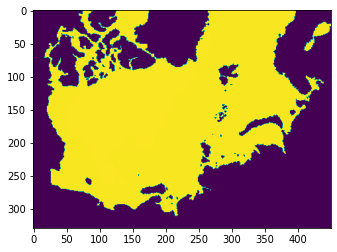

In [32]:
plt.imshow(xtt[0, 0, :, :,0])

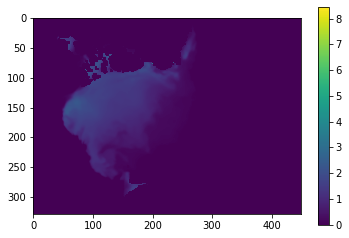

In [33]:
plt.imshow(xtt[0, 0, :, :,0], vmin=0)
plt.colorbar()

In [ ]:
plt.imshow(X_test[0, 0, :, :,0])
plt.colorbar()

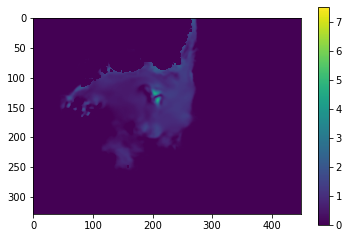

In [36]:
plt.imshow(ytt[0, 0, :, :,0], vmin=0)
plt.colorbar()

In [ ]:
history = seq.fit(xtt[:50], ytt[:50], batch_size=10, epochs=1, validation_split=0.2)

In [ ]:
ypred = seq.predict(X_test[:10])

In [ ]:
ypred.shape

In [ ]:
plt.imshow(xttest[0,0,:,:,0])

In [ ]:
plt.imshow(ytest[0,:,:])
plt.colorbar()

In [ ]:
plt.imshow(ypred[1,0,:,:,0])
plt.colorbar()

In [ ]:
np.max(ypred[1,0,:,:,0])

In [ ]:
np.min(ypred[1,0,:,:,0])

In [ ]:
np.mean(ypred[1,0,:,:,0])

In [ ]:
ypred[1,0,:,:,0]

In [ ]:
plt.imshow(ypred[1,0,:,:,0]*1000)  # , vmin=497.8, vmax=499)
plt.colorbar()

In [ ]:
def draw_sit_true_pred(ytrue, ypred, day, ndays=1):
    '''Draw subplots of SIT:
            - first colomn ytrue (TOPAZ4b)
            - second colomn ypred (ML)
    '''
    
    fig, axes = plt.subplots(ncols=2, nrows=ndays, figsize=(16,6*ndays))

    for ax in axes:
        ax[0].imshow(ytrue)
        ax[1].imshow(ypred)
        
    
    plt.show()
    plt.close()
    
    

-------------------